In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('max_row',1000)

### 2.4.1缺失值处理

In [5]:
# 导入美国年度失业率数据
unemploy = pd.read_csv('data\\unemployment.csv')

In [6]:
unemploy.head()

year      rate
0  1955  4.383333
1  1956  4.141667
2  1957  4.258333
3  1958  6.800000
4  1959  5.475000

In [8]:
# 构建一列随机缺失值列
unemploy['missing'] = unemploy['rate']
# 随机选择10%行手动填充缺失值
mis_index = unemploy.sample(frac=0.1,random_state=999).index
unemploy.loc[mis_index,'missing']=None
unemploy['missing']

0     4.383333
1     4.141667
2     4.258333
3     6.800000
4     5.475000
5     5.508333
6     6.683333
7     5.541667
8     5.666667
9     5.191667
10    4.525000
11    3.783333
12    3.841667
13    3.583333
14    3.508333
15    4.933333
16    5.958333
17    5.616667
18    4.891667
19         NaN
20    8.466666
21    7.716667
22    7.066667
23    6.066667
24    5.833333
25    7.141667
26    7.600000
27    9.708333
28    9.616667
29    7.525000
30    7.191667
31    6.991667
32    6.191667
33         NaN
34         NaN
35    5.616667
36    6.816667
37    7.508333
38    6.900000
39         NaN
40    5.608333
41    5.416667
42    4.950000
43    4.508333
44    4.216667
45    3.991667
46    4.733333
47         NaN
48    5.991667
49    5.533333
50    5.066667
51    4.616667
52    4.616667
53    5.775000
54         NaN
55    9.616667
56    8.950000
57    8.066667
58    7.375000
59    6.166667
60    5.291667
61         NaN
62    4.350000
63    3.900000
64    3.666667
65    8.091666
Name: miss

**1.使用 forward fill填补缺失值**

In [10]:
unemploy['f_fill'] = unemploy['missing']
unemploy['f_fill'].ffill(inplace=True)
unemploy['f_fill']

0     4.383333
1     4.141667
2     4.258333
3     6.800000
4     5.475000
5     5.508333
6     6.683333
7     5.541667
8     5.666667
9     5.191667
10    4.525000
11    3.783333
12    3.841667
13    3.583333
14    3.508333
15    4.933333
16    5.958333
17    5.616667
18    4.891667
19    4.891667
20    8.466666
21    7.716667
22    7.066667
23    6.066667
24    5.833333
25    7.141667
26    7.600000
27    9.708333
28    9.616667
29    7.525000
30    7.191667
31    6.991667
32    6.191667
33    6.191667
34    6.191667
35    5.616667
36    6.816667
37    7.508333
38    6.900000
39    6.900000
40    5.608333
41    5.416667
42    4.950000
43    4.508333
44    4.216667
45    3.991667
46    4.733333
47    4.733333
48    5.991667
49    5.533333
50    5.066667
51    4.616667
52    4.616667
53    5.775000
54    5.775000
55    9.616667
56    8.950000
57    8.066667
58    7.375000
59    6.166667
60    5.291667
61    5.291667
62    4.350000
63    3.900000
64    3.666667
65    8.091666
Name: f_fi

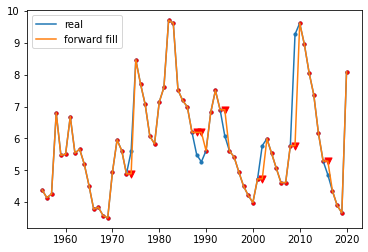

In [201]:
# 观察填充效果
plt.scatter(unemploy.year,unemploy.rate,s=10)
plt.plot(unemploy.year,unemploy.rate,label='real')
plt.scatter(unemploy[~unemploy.index.isin(mis_index)].year,unemploy[~unemploy.index.isin(mis_index)].f_fill,s=10,c='r')
plt.scatter(unemploy.loc[mis_index].year,unemploy.loc[mis_index].f_fill,s=50,c='r',marker='v')
plt.plot(unemploy.year,unemploy.f_fill,label='forward fill')
plt.legend()

**2.使用moving average填补缺失值**

In [11]:
unemploy['moveavg']=np.where(unemploy['missing'].isnull(),
                             unemploy['missing'].shift(1).rolling(3,min_periods=1).mean(),
                             unemploy['missing'])
unemploy['moveavg']

0     4.383333
1     4.141667
2     4.258333
3     6.800000
4     5.475000
5     5.508333
6     6.683333
7     5.541667
8     5.666667
9     5.191667
10    4.525000
11    3.783333
12    3.841667
13    3.583333
14    3.508333
15    4.933333
16    5.958333
17    5.616667
18    4.891667
19    5.488889
20    8.466666
21    7.716667
22    7.066667
23    6.066667
24    5.833333
25    7.141667
26    7.600000
27    9.708333
28    9.616667
29    7.525000
30    7.191667
31    6.991667
32    6.191667
33    6.791667
34    6.591667
35    5.616667
36    6.816667
37    7.508333
38    6.900000
39    7.075000
40    5.608333
41    5.416667
42    4.950000
43    4.508333
44    4.216667
45    3.991667
46    4.733333
47    4.313889
48    5.991667
49    5.533333
50    5.066667
51    4.616667
52    4.616667
53    5.775000
54    5.002778
55    9.616667
56    8.950000
57    8.066667
58    7.375000
59    6.166667
60    5.291667
61    6.277778
62    4.350000
63    3.900000
64    3.666667
65    8.091666
Name: move

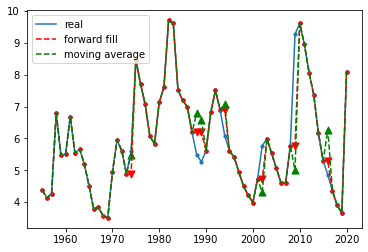

In [203]:
# 观察填充效果
plt.scatter(unemploy.year,unemploy.rate,s=10)
plt.plot(unemploy.year,unemploy.rate,label='real')
plt.scatter(unemploy[~unemploy.index.isin(mis_index)].year,unemploy[~unemploy.index.isin(mis_index)].f_fill,s=10,c='r')
plt.scatter(unemploy.loc[mis_index].year,unemploy.loc[mis_index].f_fill,s=50,c='r',marker='v')
plt.plot(unemploy.year,unemploy.f_fill,label='forward fill',c='r',linestyle = '--')
plt.scatter(unemploy[~unemploy.index.isin(mis_index)].year,unemploy[~unemploy.index.isin(mis_index)].moveavg,s=10,c='r')
plt.scatter(unemploy.loc[mis_index].year,unemploy.loc[mis_index].moveavg,s=50,c='g',marker='^')
plt.plot(unemploy.year,unemploy.moveavg,label='moving average',c='g',linestyle = '--')
plt.legend()

**3.使用interpolation填补缺失值**

In [204]:
# 尝试线性插值和多项式插值
unemploy['inter_lin']=unemploy['missing'].interpolate(method='linear')
unemploy['inter_poly']=unemploy['missing'].interpolate(method='polynomial', order=3)

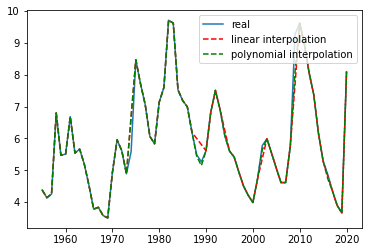

In [205]:
# 观察填充效果
plt.plot(unemploy.year,unemploy.rate,label='real')
plt.plot(unemploy.year,unemploy.inter_lin,label='linear interpolation',c='r',linestyle = '--')
plt.plot(unemploy.year,unemploy.inter_poly,label='polynomial interpolation',c='g',linestyle = '--')
plt.legend()

### 2.4.2 数据平滑

In [3]:
# 导入航空乘客数据
air = pd.read_csv('data\\air.csv')

In [4]:
air.head()

Date  Passengers
0  1949/1         112
1  1949/2         118
2  1949/3         132
3  1949/4         129
4  1949/5         121

In [13]:
# 设置两种平滑系数
air['smooth_0.5']= air.Passengers.ewm(alpha =0.5).mean()
air['smooth_0.9']= air.Passengers.ewm(alpha =0.9).mean()

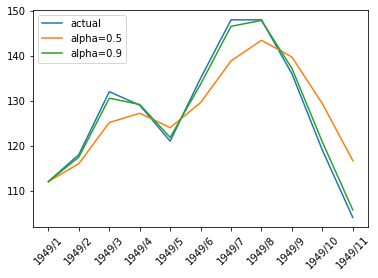

In [25]:
plt.plot(air.Date,air.Passengers,label='actual')
plt.plot(air.Date,air['smooth_0.5'],label='alpha=0.5')
plt.plot(air.Date,air['smooth_0.9'],label='alpha=0.9')
plt.xticks(rotation=45)
plt.legend()